In [23]:
from torchvision import transforms
from datasets import BaseHistoFromSampler, SlideDataSampler, SlideSampler
ptrain='/mnt/DATA_OTHER/liverC/patches/train/'
pval='/mnt/DATA_OTHER/liverC/patches/validation/'


train_slide_S = SlideSampler(root_dir=ptrain, n_sample=20)
_, train_slides = train_slide_S._sampler()

val_slide_S = SlideSampler(root_dir=pval, n_sample=20)
_, val_slides = val_slide_S._sampler()

train_slide_SD = SlideDataSampler(slide_dirs=train_slides,n_sample=200)
train_data, train_dataset_w = train_slide_SD._sampler()

val_slide_SD = SlideDataSampler(slide_dirs=val_slides,n_sample=200)
val_data, val_dataset_w = val_slide_SD._sampler()

# mean = (0.485, 0.456, 0.406)
# std = (0.5, 0.5, 0.5)

# train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ]))
# test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ])
#                             )

train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=224, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ]))
test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=224, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ])
                            )

In [24]:
import torch
n_classes = len(test_dataset.labels_set)
cuda = torch.cuda.is_available()
batch_size = 20
kwargs = {'num_workers': 3, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [87]:
image1=test_dataset[0][0].permute(1,2,0).numpy()

/home/ys309/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/ys309/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


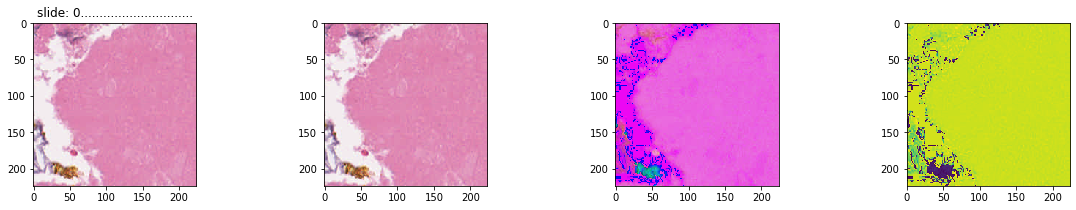

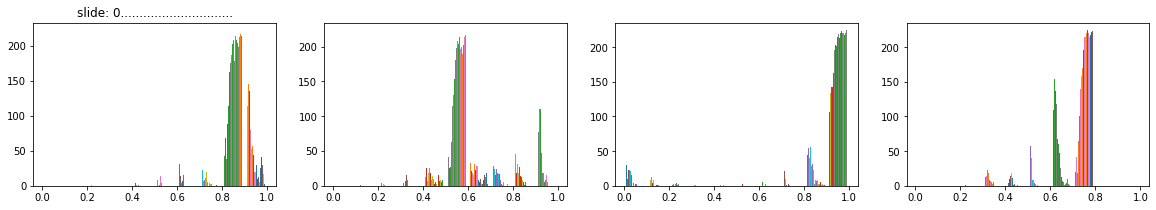

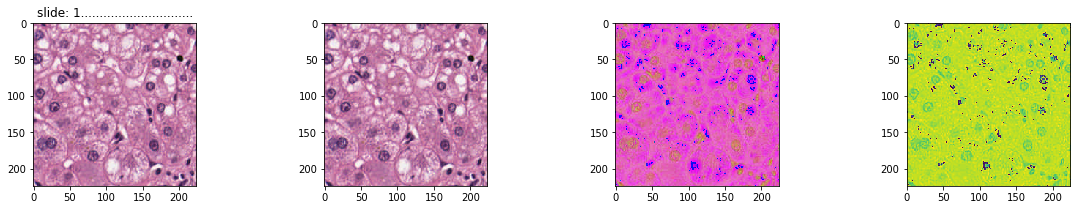

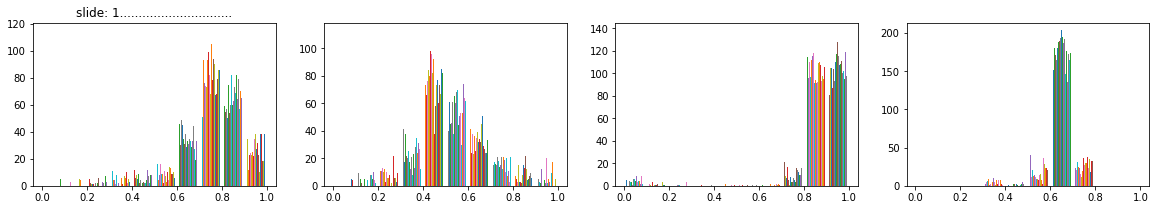

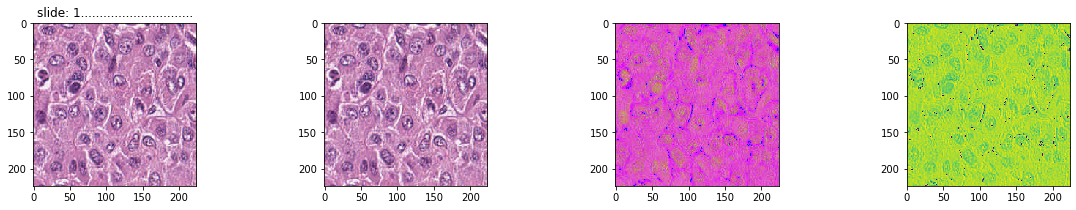

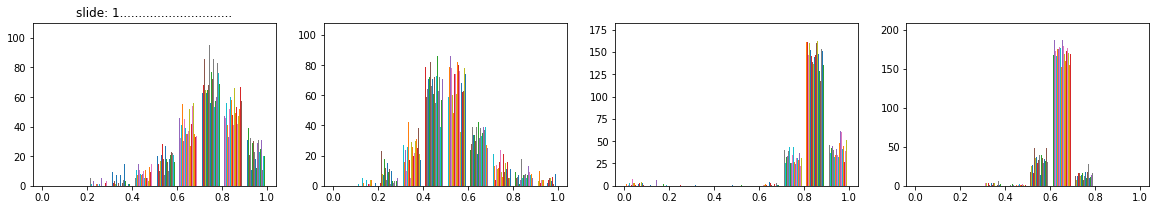

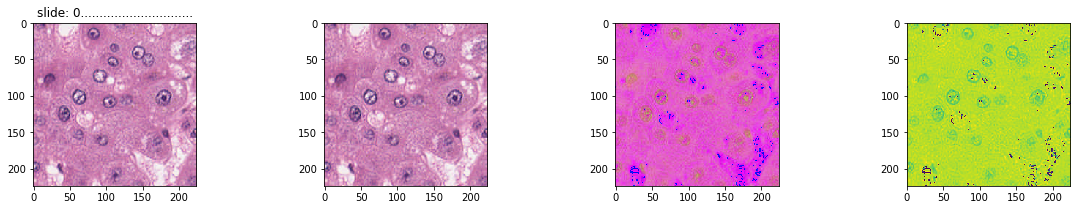

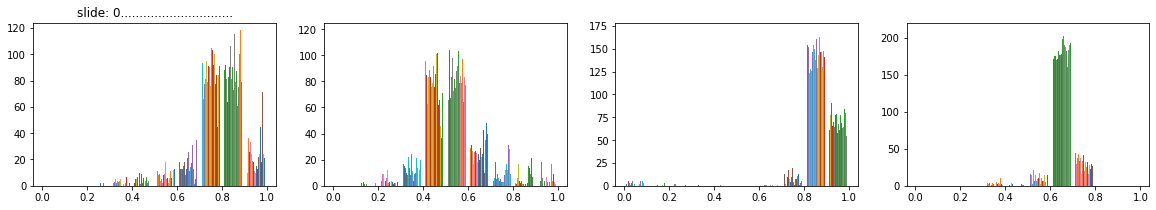

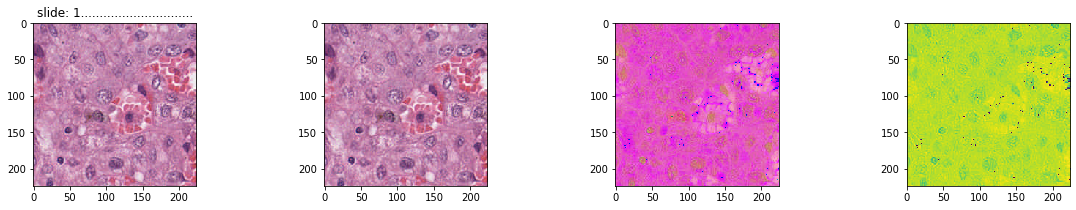

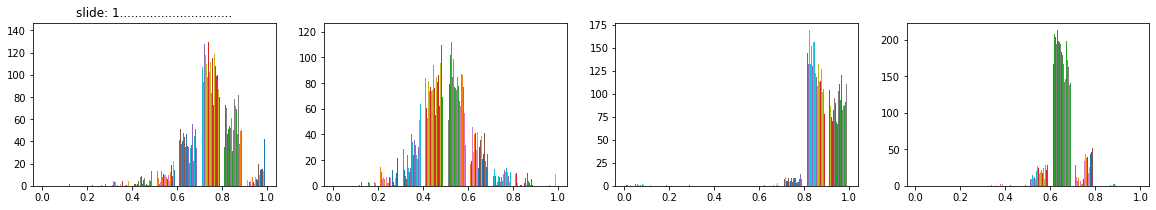

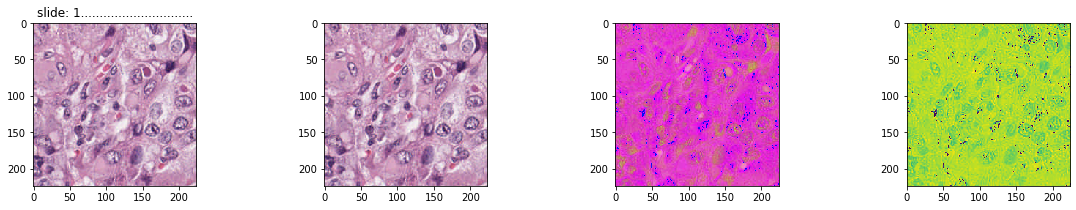

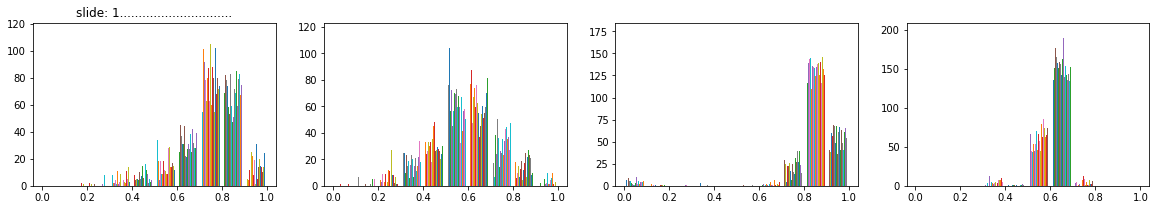

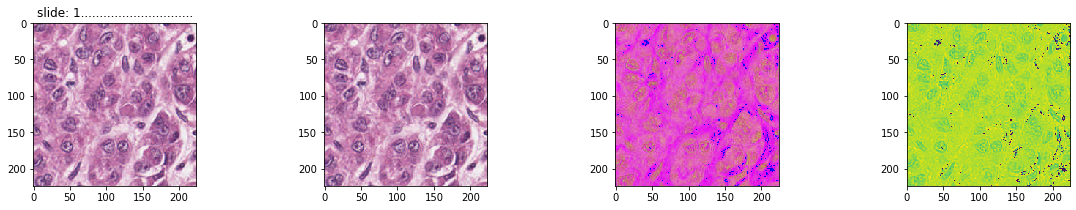

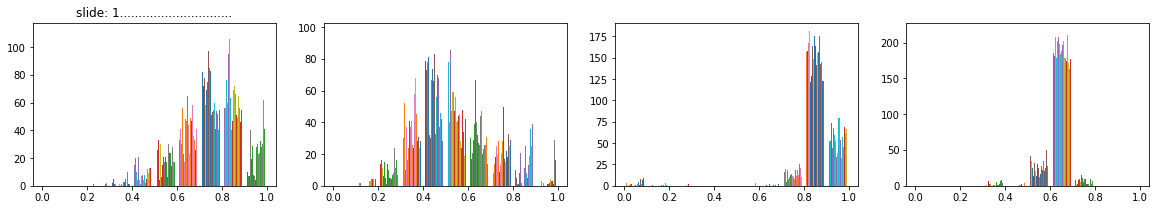

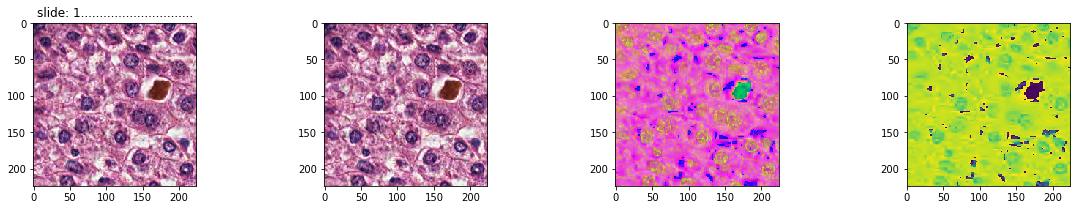

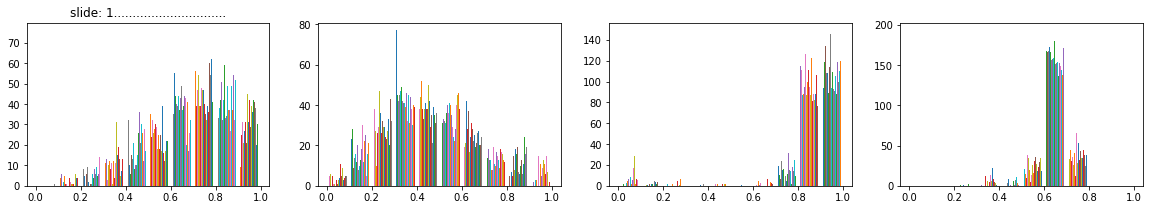

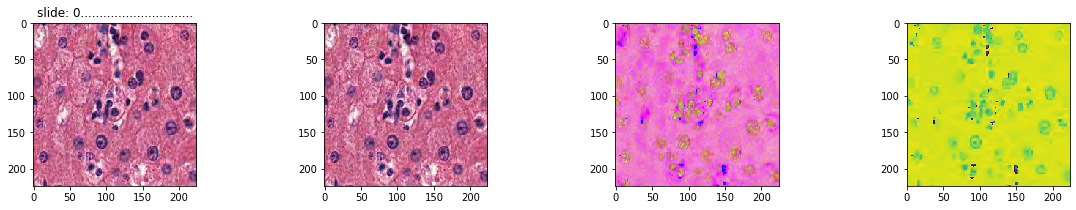

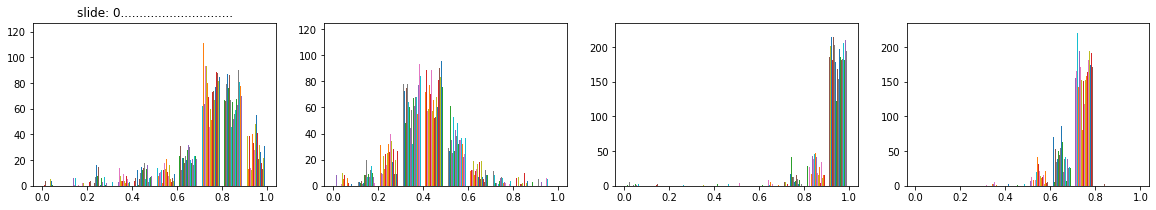

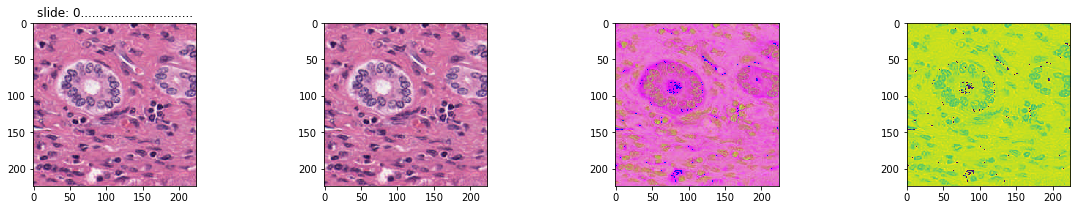

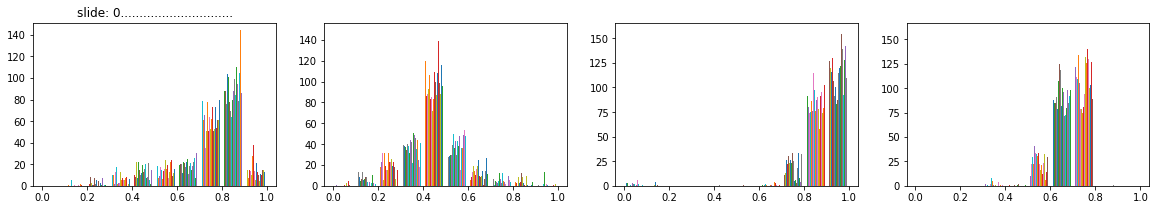

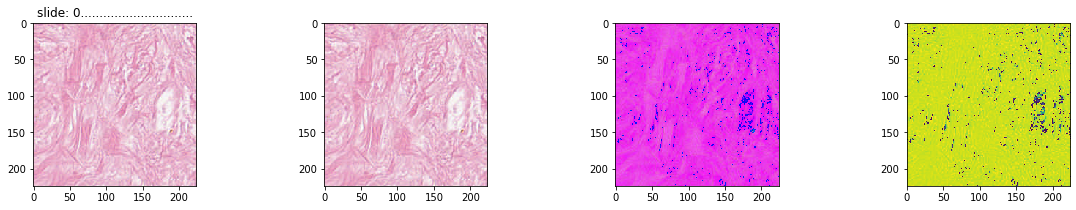

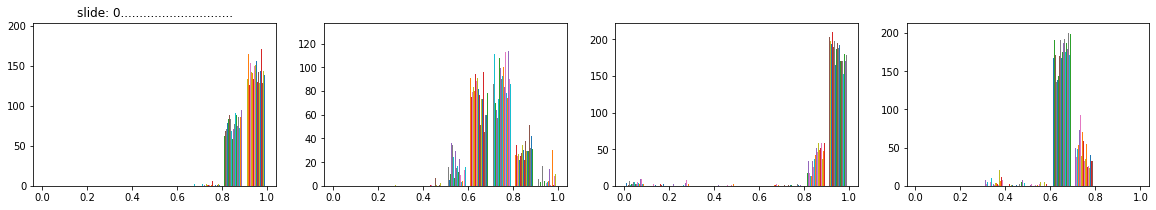

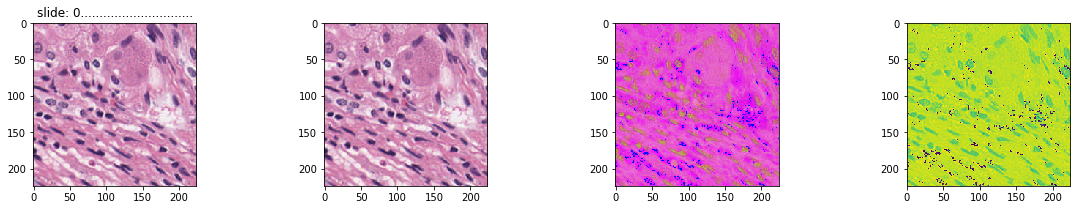

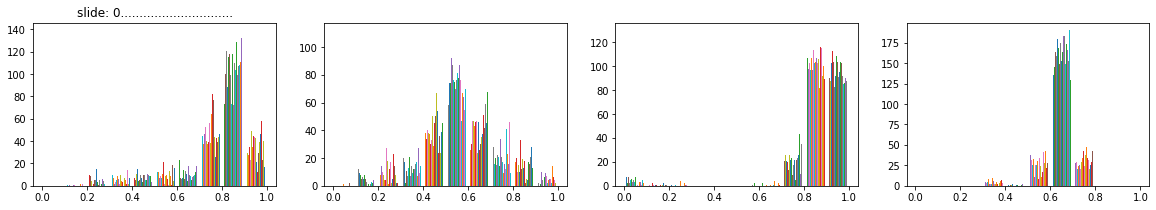

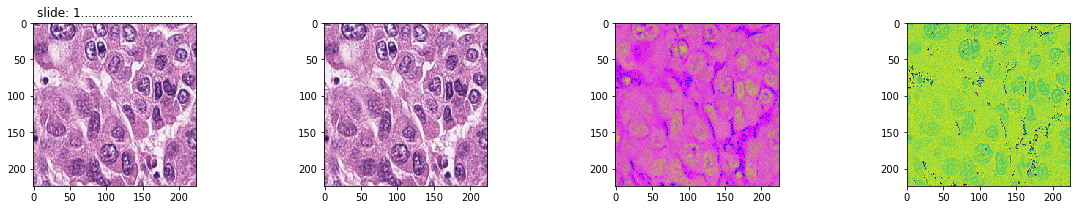

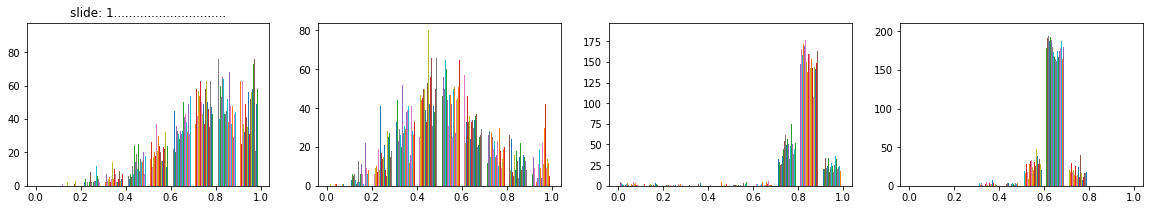

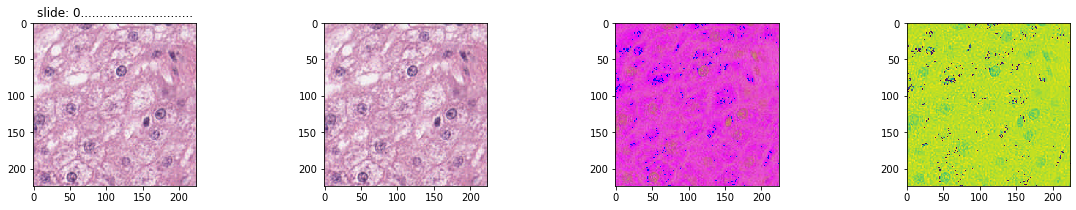

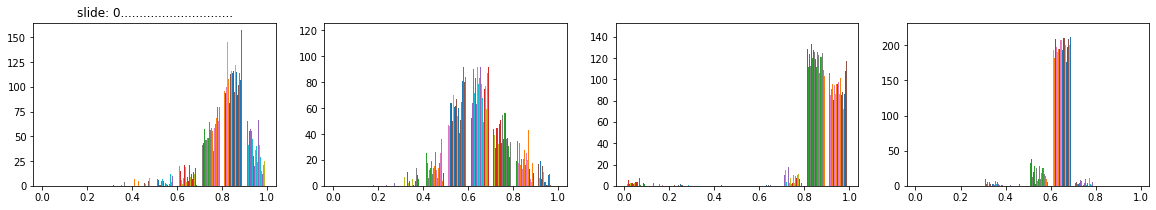

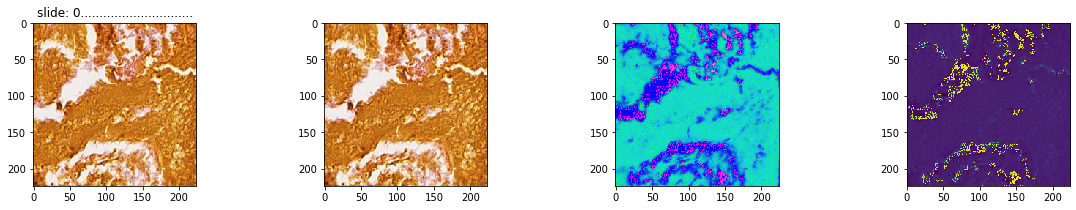

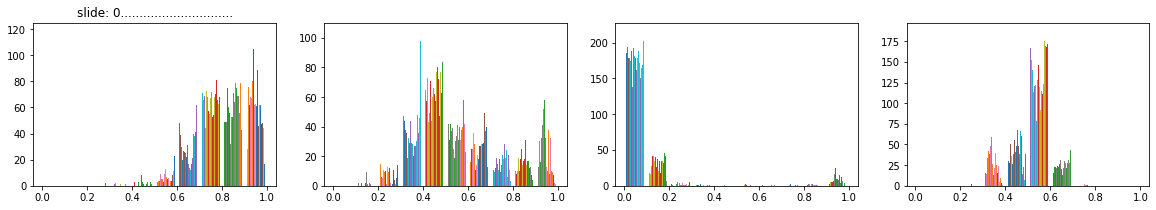

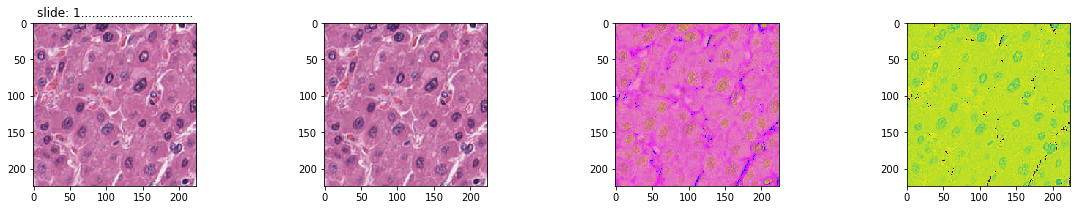

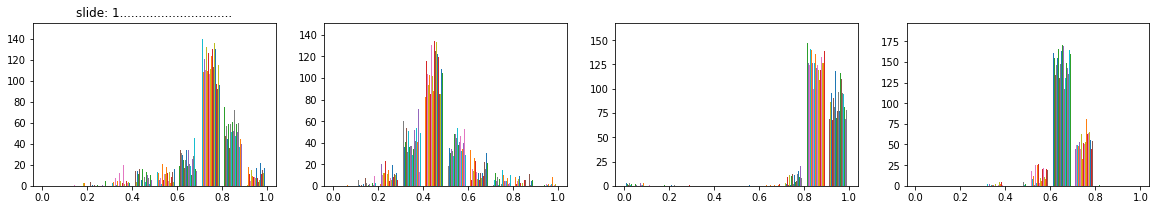

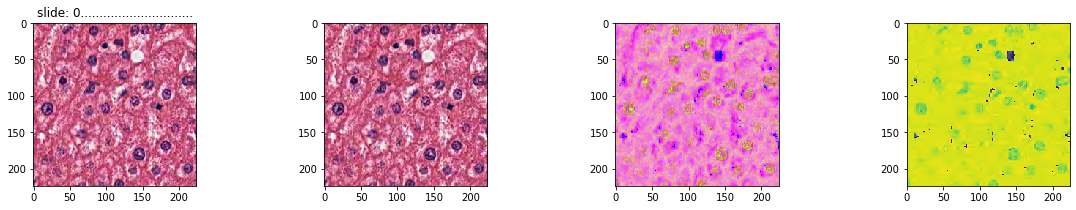

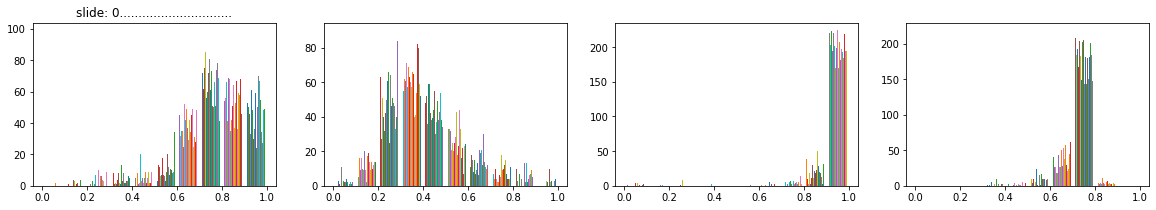

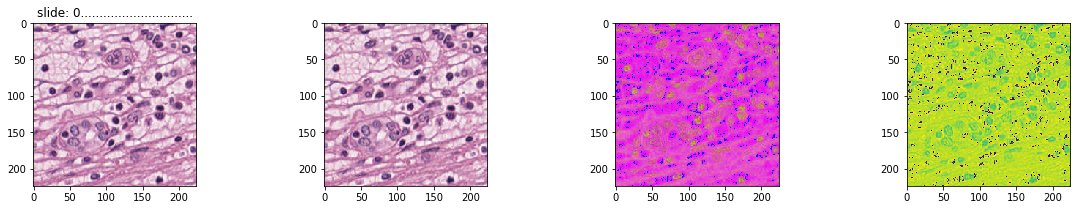

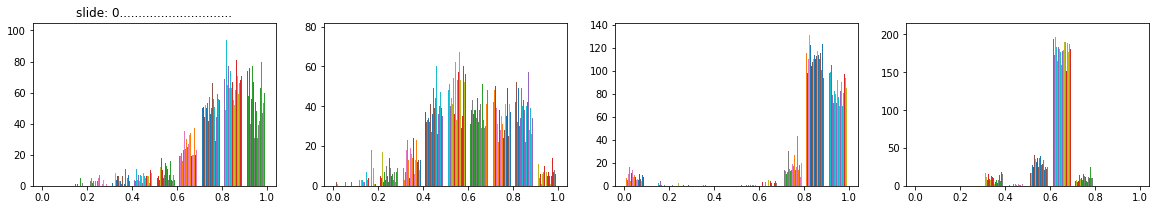

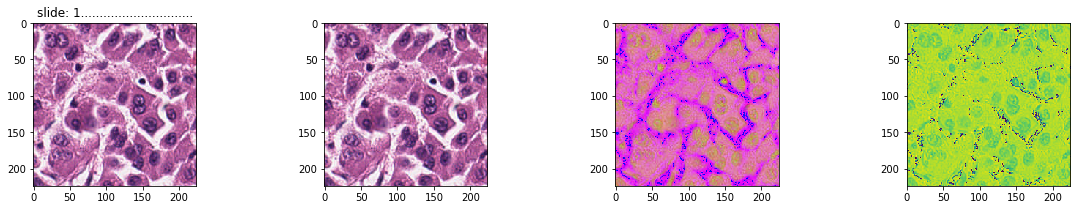

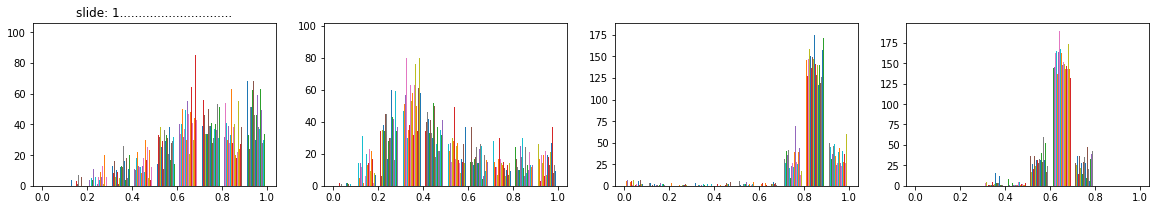

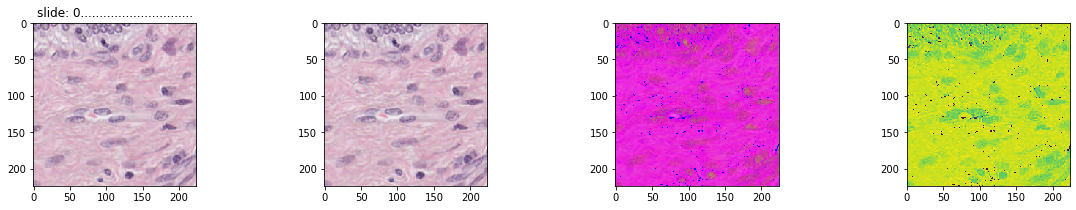

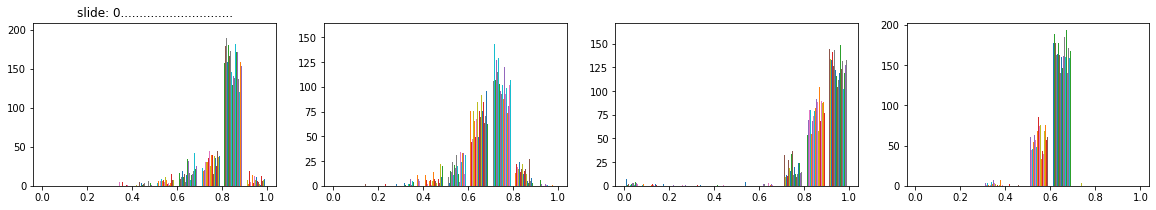

In [104]:
from skimage import color, io
for i, (images, target) in enumerate(train_loader):
    for j in range(images.shape[0]):
        
        image=images[j].permute(1,2,0).numpy()
        img=color.rgb2hsv(image)
        plot4img(image,image,img,img[:,:,0], target[j])
        plot4hist(image[:,:,0], image[:,:,1], img[:,:,0], img.sum(2)/3, target[j])
    break


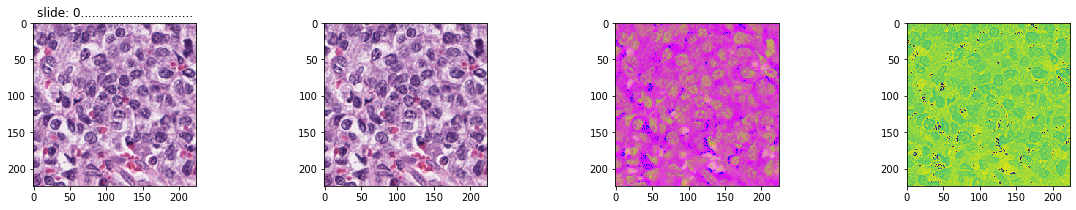

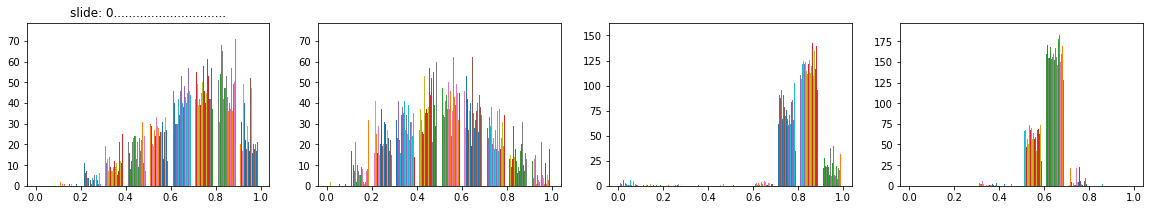

In [99]:
image2=train_dataset[1100][0].permute(1,2,0).numpy()
from skimage import color, io
img=color.rgb2hsv(image2)
plot4img(image2,image2,img,img[:,:,0])
plot4hist(image2[:,:,0], image2[:,:,1], img[:,:,0], img.sum(2)/3)

In [57]:
import numpy as np
from skimage import exposure
np.histogram(image[:,:,0], bins=10, range=(0,1))

(array([    4,    17,    24,    82,    67,   138,   610,  4888, 31221,
        13125]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

In [75]:
image.sum(2)/3

array([[0.9450981 , 0.9620915 , 0.96862745, ..., 0.7372549 , 0.7372549 ,
        0.73333335],
       [0.9450981 , 0.9372549 , 0.9359477 , ..., 0.7424837 , 0.7281046 ,
        0.7163399 ],
       [0.96732026, 0.9477124 , 0.94379085, ..., 0.76209146, 0.7450981 ,
        0.7320261 ],
       ...,
       [0.73333335, 0.7281046 , 0.7346406 , ..., 0.77385616, 0.75555557,
        0.7359478 ],
       [0.7320261 , 0.7124183 , 0.7045751 , ..., 0.8091504 , 0.7869281 ,
        0.7647059 ],
       [0.71503276, 0.6862745 , 0.66928107, ..., 0.8156862 , 0.793464  ,
        0.76993465]], dtype=float32)

In [6]:
print(exposure.histogram(image[0], nbins=2))
print(exposure.histogram(image[1], nbins=2))
print(exposure.histogram(image[2], nbins=2))
print(exposure.histogram(image, nbins=2))

(array([194, 478]), array([0.39215687, 0.7764706 ], dtype=float32))
(array([200, 472]), array([0.40882352, 0.7872549 ], dtype=float32))
(array([182, 490]), array([0.40882352, 0.79509807], dtype=float32))
(array([ 33170, 117358]), array([0.31764707, 0.77254903], dtype=float32))


In [77]:
import matplotlib.pyplot as plt
def plot4hist(img1,img2,img3,img4, slide=0):
    plt.figure(figsize=(20,3))
    plt.subplot(1,4,1)
    plt.title('slide: %d..............................'%slide)
    plt.hist(img1, bins=10, range=(0,1))
    plt.subplot(1,4,2)
    plt.hist(img2, bins=10, range=(0,1))
    plt.subplot(1,4,3)
    plt.hist(img3, bins=10, range=(0,1))
    plt.subplot(1,4,4)
    plt.hist(img4, bins=10, range=(0,1))
def plot4img(img1,img2,img3,img4, slide=0):
    plt.figure(figsize=(20,3))
    plt.subplot(1,4,1)
    plt.title('slide: %d..............................'%slide)
    plt.imshow(img1)
    plt.subplot(1,4,2)
    plt.imshow(img2)
    plt.subplot(1,4,3)
    plt.imshow(img3)
    plt.subplot(1,4,4)
    plt.imshow(img4)

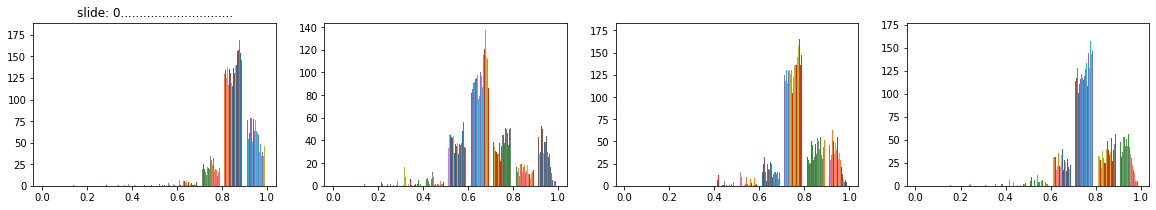

In [76]:
plot4hist(image[:,:,0], image[:,:,1], image[:,:,2], image.sum(2)/3)

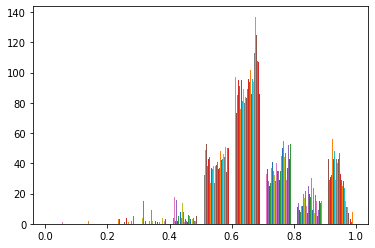

In [61]:
import matplotlib.pyplot as plt
plt.hist(image[:,:,1], bins=10, range=(0,1))
plt.show()

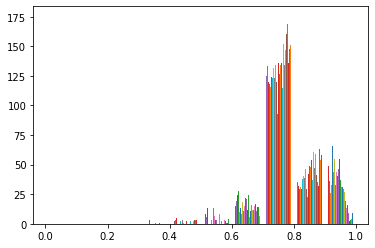

In [62]:
import matplotlib.pyplot as plt
plt.hist(image[:,:,2], bins=10, range=(0,1))
plt.show()

In [59]:
plt.hist??

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=None,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    normed=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays


In [90]:
from evaluation import *
from save_load import *

In [91]:
import torch
n_classes = len(test_dataset.labels_set)
cuda = torch.cuda.is_available()
batch_size = 20
kwargs = {'num_workers': 3, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [92]:
# Set up the network and training parameters
from networks import SiameseClassificationNet
from googlenet import InceptionEmbadding1D
from losses import ContrastiveClassificationLoss
from metrics import SiameseAccumulatedAccuracyMetric

margin = 1.
embedding_net = InceptionEmbadding1D(2)
model = SiameseClassificationNet(embedding_net, n_classes)
model_name = 'InceptionEmbedding_Siamese_C_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model,model_name, 13)

In [19]:
test_dataset[0][0].shape

torch.Size([3, 224, 224])

In [5]:
import torch.nn.functional as F

In [93]:
for i, (images, target) in enumerate(train_loader):
    if i==0:
        if cuda:
            images = images.cuda()
        output=model.get_embedding(images)
        print(output.data.cpu().numpy())
        out=model.get_classification(images)
        print(out)
        print(out.max(1)[1])
        output=F.log_softmax(output, dim=-1)
        print(output)
        print(output.max(1)[1])
        break

[[ 6.65771127e-01  6.11274242e-01  3.29051018e-01  2.95387357e-01
  -2.79392570e-01  6.79440975e-01 -9.89318863e-02  3.08911026e-01
   3.22654217e-01  6.41956508e-01  3.60721022e-01 -2.65614450e-01]
 [ 3.79585922e-02  3.52135822e-02  5.84525347e-01  6.65002882e-01
  -4.91140187e-01  3.91546711e-02 -1.64145827e-01  5.67703724e-01
   6.71088159e-01  3.67603786e-02  6.17538035e-01 -4.30902958e-01]
 [ 6.46594644e-01  5.96545815e-01  3.31739724e-01  3.03716004e-01
  -2.84900188e-01  6.60677195e-01 -1.01223826e-01  3.13884437e-01
   3.28034192e-01  6.24886513e-01  3.64721626e-01 -2.70637304e-01]
 [-5.66273928e-04 -2.14581192e-03  5.98483920e-01  6.81414783e-01
  -5.02819657e-01  3.42214480e-03 -1.67511553e-01  5.77634513e-01
   6.82656944e-01  2.29350850e-03  6.29276514e-01 -4.35477018e-01]
 [ 8.67858902e-03  2.49900669e-03  5.91999710e-01  6.74555480e-01
  -4.97370422e-01  1.01422146e-02 -1.66480035e-01  5.74233115e-01
   6.77258670e-01  7.55924731e-03  6.24438107e-01 -4.34258282e-01]
 [ 1.

NameError: name 'F' is not defined

In [25]:
import torch.nn.functional as F


In [1]:
import torch
torch.cuda.is_available()

True

In [4]:
which ipython


SyntaxError: invalid syntax (<ipython-input-4-c2c7b60aec30>, line 1)